# Exploratory Data Analysis (EDA)
This notebook explores the simulated sleep dataset and extracts insights before model training.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plotting
sns.set(style='whitegrid')
%matplotlib inline

In [3]:
# Load the dataset
df = pd.read_csv('data/simulated_sleep_data.csv')
df.head()

,date,profile,screen_time_min,sleep_duration_min,bedtime,dark_mode,app_used,sleep_quality_score
0,2025-01-04,average phone user,346,408,23:40,0,Instagram,6.92
1,2025-01-23,heavy phone user,1245,298,03:28,1,Instagram,1.00
2,2025-01-10,average phone user,329,475,23:40,0,YouTube,7.76
3,2025-01-26,average phone user,269,364,23:01,0,Reddit,6.82
4,2025-01-01,healthy phone use,138,583,21:56,1,Long content,9.85


In [4]:
# Overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 100 non-null    object 
 1   profile              100 non-null    object 
 2   screen_time_min      100 non-null    int64  
 3   sleep_duration_min   100 non-null    int64  
 4   bedtime              100 non-null    object 
 5   dark_mode            100 non-null    int64  
 6   app_used             100 non-null    object 
 7   sleep_quality_score  100 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [5]:
# Basic statistics for numerical columns
df.describe()

,screen_time_min,sleep_duration_min,dark_mode,sleep_quality_score
count,100.000000,100.000000,100.000000,100.000000
mean,488.310000,374.280000,0.470000,5.851200
std,412.722586,142.026465,0.501614,3.714522
min,60.000000,65.000000,0.000000,1.000000
25%,154.750000,251.000000,0.000000,1.000000
50%,317.000000,380.500000,0.000000,7.220000
75%,730.000000,486.250000,1.000000,9.555000
max,1370.000000,595.000000,1.000000,10.000000


In [6]:
# Check for missing values
df.isnull().sum()

date                   0
profile                0
screen_time_min        0
sleep_duration_min     0
bedtime                0
dark_mode              0
app_used               0
sleep_quality_score    0
dtype: int64

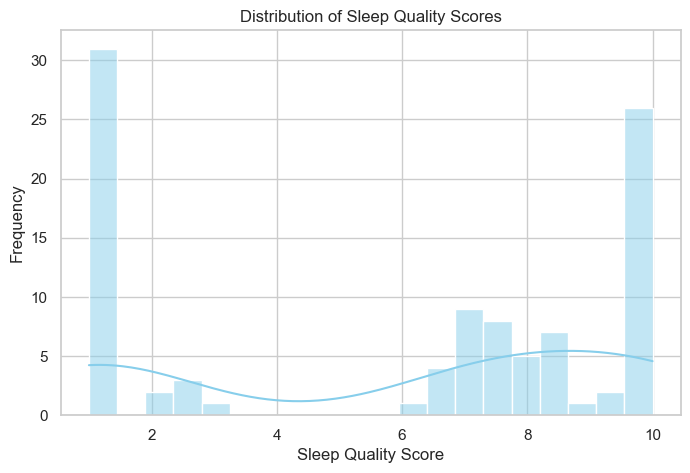

In [7]:
# Distribution of sleep quality scores
plt.figure(figsize=(8, 5))
sns.histplot(df['sleep_quality_score'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Sleep Quality Scores')
plt.xlabel('Sleep Quality Score')
plt.ylabel('Frequency')
plt.show()

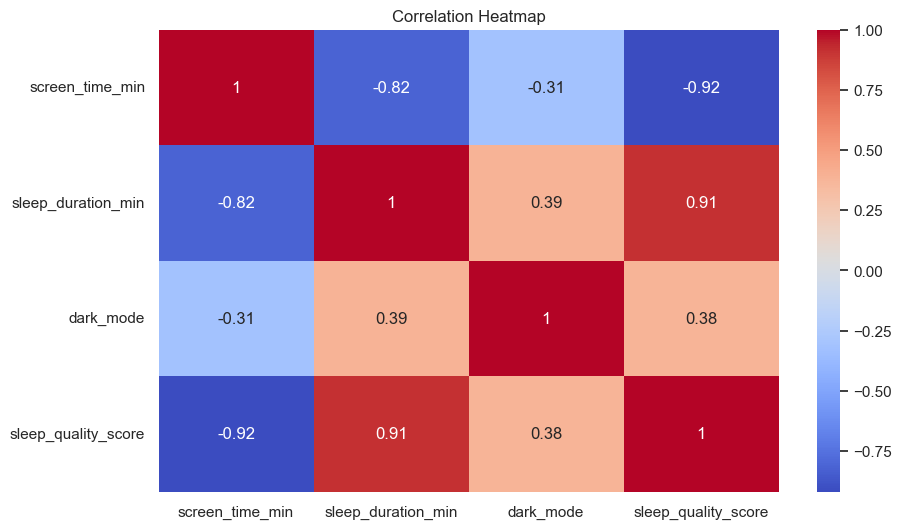

In [8]:
# Correlation matrix (only numeric features)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

/var/folders/rq/176pvpfs1bxdw60ztqb6k2bw0000gn/T/ipykernel_53879/3836584588.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='profile', y='sleep_quality_score', palette='Set2')


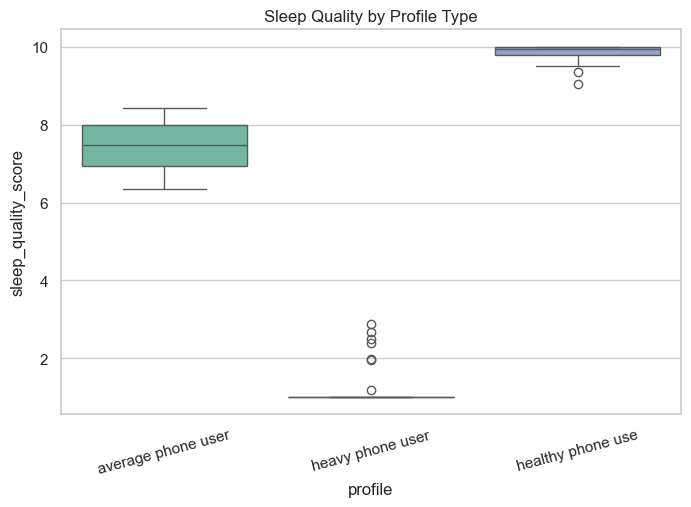

In [9]:
# Boxplot of sleep quality score by profile type
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='profile', y='sleep_quality_score', palette='Set2')
plt.title('Sleep Quality by Profile Type')
plt.xticks(rotation=15)
plt.show()

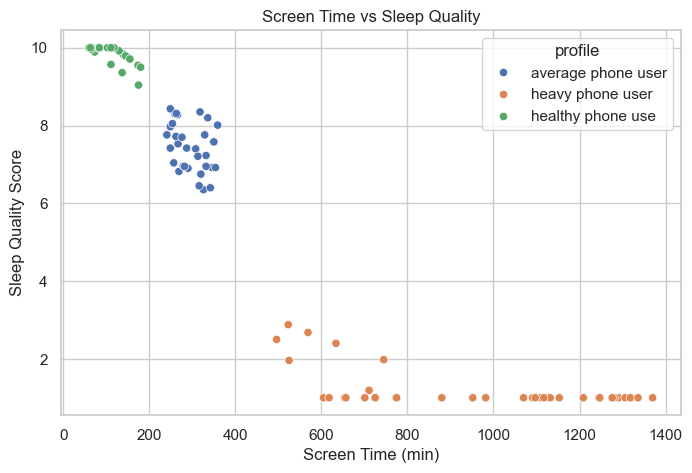

In [10]:
# Scatter plot: Screen Time vs Sleep Quality
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='screen_time_min', y='sleep_quality_score', hue='profile')
plt.title('Screen Time vs Sleep Quality')
plt.xlabel('Screen Time (min)')
plt.ylabel('Sleep Quality Score')
plt.show()

## Model Training – Step 1: Prepare Features and Target


In [11]:
# Select relevant numeric features for modeling
feature_columns = ['screen_time_min', 'sleep_duration_min', 'dark_mode']
target_column = 'sleep_quality_score'

# Define features (X) and target (y)
X = df[feature_columns]
y = df[target_column]


In [12]:
!pip install scikit-learn



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [13]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 80
Testing samples: 20


### Model Training – Step 2: Linear Regression (Baseline Model)

In this step, we train a baseline model using linear regression to predict the sleep quality score.  
This model helps us understand how well a simple linear approach can perform with the current features.  
It also serves as a reference point for evaluating more complex models later.


In [14]:
# Train a Linear Regression model as a baseline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Linear Regression Performance:
Mean Squared Error (MSE): 1.44
R² Score: 0.90


## Model Training – Step 3: Visualize Predictions vs Actual


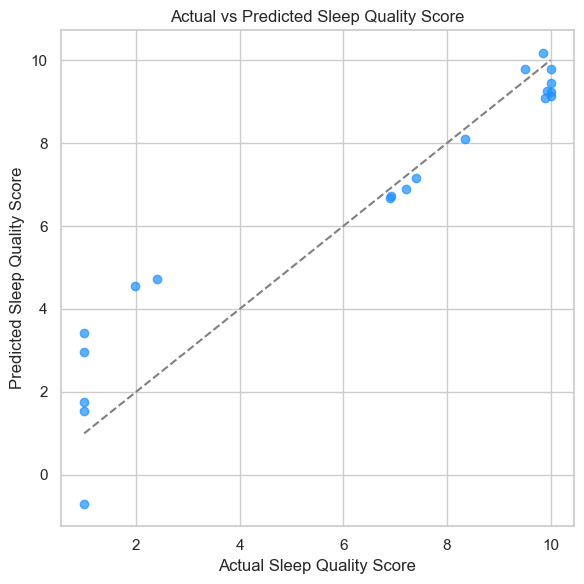

In [15]:
import matplotlib.pyplot as plt

# Scatter plot: true vs predicted values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='dodgerblue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='gray')  # Ligne parfaite
plt.xlabel('Actual Sleep Quality Score')
plt.ylabel('Predicted Sleep Quality Score')
plt.title('Actual vs Predicted Sleep Quality Score')
plt.grid(True)
plt.tight_layout()
plt.show()


>  **Observation**: The predictions made by the linear regression model align closely with the actual values, as shown by how near the points are to the diagonal. This confirms a strong linear relationship between features and sleep quality in this dataset.


## Model Training – Step 4: Ridge Regression (Regularization)


Ridge Regression is a linear model like standard Linear Regression, but it adds **L2 regularization**.  
This means it penalizes large coefficient values to reduce overfitting and improve generalization.

It is useful when:
- Some features are correlated,
- We want a more robust version of linear regression.

We'll train a Ridge model and compare its performance (MSE and R² score) to our baseline Linear Regression.


In [16]:
from sklearn.linear_model import Ridge

# Initialize and train Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # alpha controls the regularization strength
ridge_model.fit(X_train, y_train)

# Predict on test set
ridge_pred = ridge_model.predict(X_test)

# Evaluate Ridge model
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print("Ridge Regression Performance:")
print(f"Mean Squared Error (MSE): {ridge_mse:.2f}")
print(f"R² Score: {ridge_r2:.2f}")


Ridge Regression Performance:
Mean Squared Error (MSE): 1.43
R² Score: 0.90


>  **Ridge Regression Summary**: With `alpha = 1.0`, Ridge regularization gives results almost identical to linear regression (MSE ≈ 1.43, R² ≈ 0.90), showing that the dataset may not suffer from overfitting. However, Ridge adds robustness by penalizing overly complex models.


Although both Linear and Ridge regression perform well, we now explore a more **robust and flexible model** — such as a Decision Tree or Random Forest  to handle potential **non linear patterns** in the data and compare generalization performance.


## Model Training – Step 4: Decision Tree Regressor

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions on the test set
tree_predictions = tree_model.predict(X_test)

# Evaluate performance
tree_mse = mean_squared_error(y_test, tree_predictions)
tree_r2 = r2_score(y_test, tree_predictions)

# Print evaluation metrics
print("Decision Tree Regressor Performance:")
print(f"Mean Squared Error (MSE): {tree_mse:.2f}")
print(f"R² Score: {tree_r2:.2f}")


Decision Tree Regressor Performance:
Mean Squared Error (MSE): 0.22
R² Score: 0.98


The Decision Tree Regressor achieved a very low Mean Squared Error (0.22) and a high R² score (0.98), suggesting it fits the test data extremely well. However, such high performance may also indicate overfitting. To validate this, we will try a more robust model with built-in regularization: the Random Forest Regressor.


### Model Training – Step 5: Random Forest Regressor


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Print evaluation metrics
print("Random Forest Regressor Performance:")
print(f"Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"R² Score: {rf_r2:.2f}")


Random Forest Regressor Performance:
Mean Squared Error (MSE): 0.16
R² Score: 0.99


The Random Forest model achieves the best performance so far, with both a very low error (MSE = 0.16) and a high R² score (0.99).  
This confirms that ensemble methods like Random Forest are well-suited to capture complex, non-linear relationships in the sleep quality data.


## Model Comparison

Here is a summary table comparing the performance of all tested regression models using Mean Squared Error (MSE) and R² Score on the test set.


In [19]:
# Create a comparison table for all models
import pandas as pd

model_results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Decision Tree", "Random Forest"],
    "MSE":    [mse, ridge_mse, tree_mse, rf_mse],
    "R2":     [r2, ridge_r2, tree_r2, rf_r2]
})

display(model_results)


,Model,MSE,R2
0,Linear Regression,1.438730,0.899020
1,Ridge Regression,1.426514,0.899877
2,Decision Tree,0.216295,0.984819
3,Random Forest,0.164493,0.988455


**Conclusion:**  
Among all tested models, the **Random Forest Regressor** achieves the lowest Mean Squared Error (MSE = 0.16) and the highest R² score (0.99), indicating the best predictive performance on this dataset.


## Model Visualization 


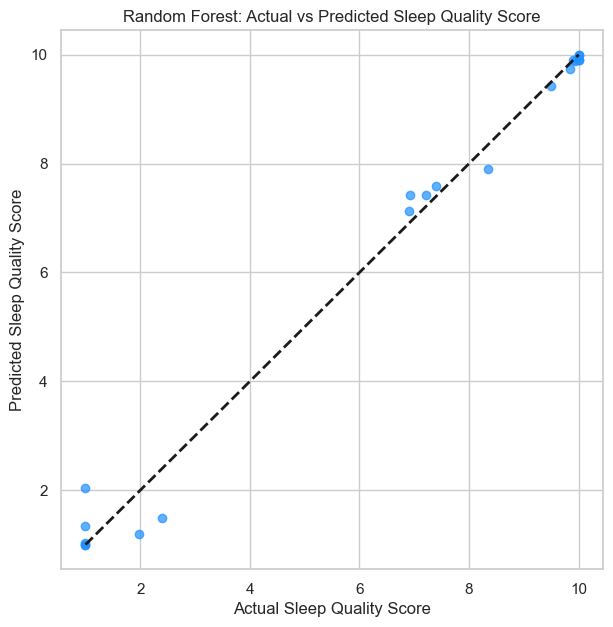

In [20]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values for Random Forest
plt.figure(figsize=(7, 7))
plt.scatter(y_test, rf_predictions, color='dodgerblue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Sleep Quality Score")
plt.ylabel("Predicted Sleep Quality Score")
plt.title("Random Forest: Actual vs Predicted Sleep Quality Score")
plt.show()


> The scatter plot shows that most predictions from the Random Forest model are very close to the actual sleep quality scores. Points close to the diagonal indicate accurate predictions, confirming that the Random Forest model fits the data very well.


## What are the most important factors influencing sleep quality in this dataset?

## Feature Importance Analysis


In [21]:
# Get feature importances from the trained Random Forest model
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a table of feature importances
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Display the table
display(feature_importance_df)


,Feature,Importance
1,sleep_duration_min,0.532440
0,screen_time_min,0.466441
2,dark_mode,0.001120


/var/folders/rq/176pvpfs1bxdw60ztqb6k2bw0000gn/T/ipykernel_53879/3265907378.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


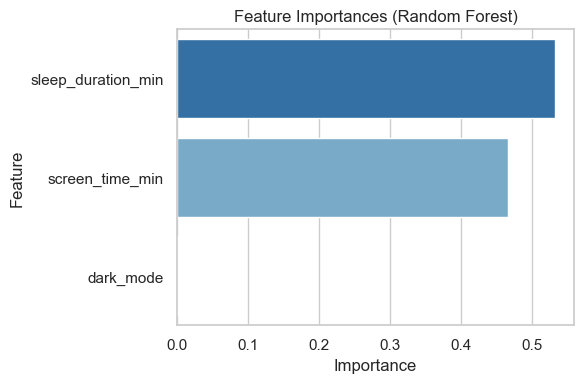

In [22]:
# Visualize feature importances (Random Forest)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.barplot(
    data=feature_importance_df,
    x='Importance', y='Feature',
    palette='Blues_r'
)
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


> According to the Random Forest model, the most important factors influencing sleep quality in this dataset are **sleep duration** and **screen time**. Dark mode usage has a negligible impact. This suggests that increasing sleep duration and reducing screen time may significantly improve sleep quality.


In [24]:
import pickle

with open("sleep_rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)
